# 1. Удалим из рассмотрения данные о котировках Йены, Фунта и Франка.

In [132]:
#ДЕЛАЕМ ДЛЯ ЕВРО
import pandas as pd
import numpy as np

In [172]:
EUR = pd.read_csv('EURUSD_M5_202201030005_202208081305.csv', sep = '\t')
#  sep = '\t' - разделитель столбиков 

In [173]:
EUR

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2022.01.03,00:05:00,1.13693,1.13693,1.13645,1.13674,49,0,31
1,2022.01.03,00:10:00,1.13674,1.13729,1.13669,1.13713,49,0,22
2,2022.01.03,00:15:00,1.13708,1.13723,1.13699,1.13719,43,0,37
3,2022.01.03,00:20:00,1.13689,1.13709,1.13688,1.13708,26,0,61
4,2022.01.03,00:25:00,1.13707,1.13717,1.13692,1.13708,35,0,65
...,...,...,...,...,...,...,...,...,...
44736,2022.08.08,12:45:00,1.01790,1.01823,1.01786,1.01798,393,0,0
44737,2022.08.08,12:50:00,1.01800,1.01859,1.01788,1.01848,377,0,0
44738,2022.08.08,12:55:00,1.01848,1.01892,1.01843,1.01876,437,0,0
44739,2022.08.08,13:00:00,1.01877,1.01902,1.01861,1.01864,344,0,0


In [174]:
#EUR['DT']= EUR['<DATE>'] + EUR['<TIME>']

In [175]:
EUR = EUR.rename(columns = {'<TIME>':'Time'})

In [176]:
EUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44741 entries, 0 to 44740
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <DATE>     44741 non-null  object 
 1   Time       44741 non-null  object 
 2   <OPEN>     44741 non-null  float64
 3   <HIGH>     44741 non-null  float64
 4   <LOW>      44741 non-null  float64
 5   <CLOSE>    44741 non-null  float64
 6   <TICKVOL>  44741 non-null  int64  
 7   <VOL>      44741 non-null  int64  
 8   <SPREAD>   44741 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.1+ MB


# разделяю столбик время отдельно на часы,минуты,секунды ,добавляю в датасет и из объекта меняю тип на int:

# Добавим в исходные данные время суток (при желании можно проекцию времени на окружность)

In [177]:
EUR[['hh', 'mm', 'ss']] = EUR['Time'].str.split(':', expand=True)


In [178]:
EUR['hh']=EUR['hh'].astype(str).astype(int)

In [179]:
print(EUR.dtypes)

<DATE>        object
Time          object
<OPEN>       float64
<HIGH>       float64
<LOW>        float64
<CLOSE>      float64
<TICKVOL>      int64
<VOL>          int64
<SPREAD>       int64
hh             int32
mm            object
ss            object
dtype: object


In [180]:
EUR['mm']=EUR['mm'].astype(str).astype(int)

In [181]:
print(EUR.dtypes)

<DATE>        object
Time          object
<OPEN>       float64
<HIGH>       float64
<LOW>        float64
<CLOSE>      float64
<TICKVOL>      int64
<VOL>          int64
<SPREAD>       int64
hh             int32
mm             int32
ss            object
dtype: object


In [182]:
EUR['ss']=EUR['ss'].astype(str).astype(int)

In [183]:
print(EUR.dtypes)

<DATE>        object
Time          object
<OPEN>       float64
<HIGH>       float64
<LOW>        float64
<CLOSE>      float64
<TICKVOL>      int64
<VOL>          int64
<SPREAD>       int64
hh             int32
mm             int32
ss             int32
dtype: object


In [184]:
# Разделенные столбики объединяем в один и переводим все в секунды
EUR['TimeInSeconds'] = EUR['hh'] * 3600 + EUR['mm'] * 60 + EUR['ss']
#int(hh) * 3600 + int(mm) * 60 + int(ss)

In [185]:
EUR

,<DATE>,Time,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,hh,mm,ss,TimeInSeconds
0,2022.01.03,00:05:00,1.13693,1.13693,1.13645,1.13674,49,0,31,0,5,0,300
1,2022.01.03,00:10:00,1.13674,1.13729,1.13669,1.13713,49,0,22,0,10,0,600
2,2022.01.03,00:15:00,1.13708,1.13723,1.13699,1.13719,43,0,37,0,15,0,900
3,2022.01.03,00:20:00,1.13689,1.13709,1.13688,1.13708,26,0,61,0,20,0,1200
4,2022.01.03,00:25:00,1.13707,1.13717,1.13692,1.13708,35,0,65,0,25,0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44736,2022.08.08,12:45:00,1.01790,1.01823,1.01786,1.01798,393,0,0,12,45,0,45900
44737,2022.08.08,12:50:00,1.01800,1.01859,1.01788,1.01848,377,0,0,12,50,0,46200
44738,2022.08.08,12:55:00,1.01848,1.01892,1.01843,1.01876,437,0,0,12,55,0,46500
44739,2022.08.08,13:00:00,1.01877,1.01902,1.01861,1.01864,344,0,0,13,0,0,46800


In [186]:
 # Перевожу все в часы для дальнейшего размещения на окружности
EUR['TimeInHours'] = EUR['TimeInSeconds']/3600

In [187]:
EUR

,<DATE>,Time,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,hh,mm,ss,TimeInSeconds,TimeInHours
0,2022.01.03,00:05:00,1.13693,1.13693,1.13645,1.13674,49,0,31,0,5,0,300,0.083333
1,2022.01.03,00:10:00,1.13674,1.13729,1.13669,1.13713,49,0,22,0,10,0,600,0.166667
2,2022.01.03,00:15:00,1.13708,1.13723,1.13699,1.13719,43,0,37,0,15,0,900,0.250000
3,2022.01.03,00:20:00,1.13689,1.13709,1.13688,1.13708,26,0,61,0,20,0,1200,0.333333
4,2022.01.03,00:25:00,1.13707,1.13717,1.13692,1.13708,35,0,65,0,25,0,1500,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44736,2022.08.08,12:45:00,1.01790,1.01823,1.01786,1.01798,393,0,0,12,45,0,45900,12.750000
44737,2022.08.08,12:50:00,1.01800,1.01859,1.01788,1.01848,377,0,0,12,50,0,46200,12.833333
44738,2022.08.08,12:55:00,1.01848,1.01892,1.01843,1.01876,437,0,0,12,55,0,46500,12.916667
44739,2022.08.08,13:00:00,1.01877,1.01902,1.01861,1.01864,344,0,0,13,0,0,46800,13.000000


In [165]:
# НЕ ВЫШЛА ДАННАЯ ФУНКЦИЯ!!!!!!

#def get_seconds(time_str):
#    print('Time in hh:mm:ss:', time_str)
    # split in hh, mm, ss
    #hh, mm, ss = time_str.split(':')
#    hh, mm, ss = time_str.str.split(':')
#    return int(hh) * 3600 + int(mm) * 60 + int(ss)


In [188]:
#время с окружностью делаю,проекция на окружность для часов.
# 24*60 = 1440
#24*60 * 60 = 86400
def make_harmonic_features_cos(value, period=1440):
    value *= 2 * np.pi / period
    return np.cos(value)


def make_harmonic_features_sin(value, period=1440):
    value *= 2 * np.pi / period
    return np.sin(value)

In [189]:
EUR['time_sin']= EUR.TimeInHours.apply(make_harmonic_features_sin)

In [190]:
EUR['time_cos']= EUR.TimeInHours.apply(make_harmonic_features_cos)

In [191]:
EUR

,<DATE>,Time,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,hh,mm,ss,TimeInSeconds,TimeInHours,time_sin,time_cos
0,2022.01.03,00:05:00,1.13693,1.13693,1.13645,1.13674,49,0,31,0,5,0,300,0.083333,0.000364,1.000000
1,2022.01.03,00:10:00,1.13674,1.13729,1.13669,1.13713,49,0,22,0,10,0,600,0.166667,0.000727,1.000000
2,2022.01.03,00:15:00,1.13708,1.13723,1.13699,1.13719,43,0,37,0,15,0,900,0.250000,0.001091,0.999999
3,2022.01.03,00:20:00,1.13689,1.13709,1.13688,1.13708,26,0,61,0,20,0,1200,0.333333,0.001454,0.999999
4,2022.01.03,00:25:00,1.13707,1.13717,1.13692,1.13708,35,0,65,0,25,0,1500,0.416667,0.001818,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44736,2022.08.08,12:45:00,1.01790,1.01823,1.01786,1.01798,393,0,0,12,45,0,45900,12.750000,0.055604,0.998453
44737,2022.08.08,12:50:00,1.01800,1.01859,1.01788,1.01848,377,0,0,12,50,0,46200,12.833333,0.055967,0.998433
44738,2022.08.08,12:55:00,1.01848,1.01892,1.01843,1.01876,437,0,0,12,55,0,46500,12.916667,0.056330,0.998412
44739,2022.08.08,13:00:00,1.01877,1.01902,1.01861,1.01864,344,0,0,13,0,0,46800,13.000000,0.056693,0.998392


In [192]:
EUR = EUR.rename(columns = {'<OPEN>':'o_e','<HIGH>':'h_e','<LOW>':'l_e','<CLOSE>':'c_e','<TICKVOL>':'vol_e' })

In [194]:
EUR = EUR.drop(['<VOL>','<SPREAD>','<DATE>','Time','hh','mm','ss','TimeInSeconds','TimeInHours'],axis = 1)

In [195]:
EUR 

,o_e,h_e,l_e,c_e,vol_e,time_sin,time_cos
0,1.13693,1.13693,1.13645,1.13674,49,0.000364,1.000000
1,1.13674,1.13729,1.13669,1.13713,49,0.000727,1.000000
2,1.13708,1.13723,1.13699,1.13719,43,0.001091,0.999999
3,1.13689,1.13709,1.13688,1.13708,26,0.001454,0.999999
4,1.13707,1.13717,1.13692,1.13708,35,0.001818,0.999998
...,...,...,...,...,...,...,...
44736,1.01790,1.01823,1.01786,1.01798,393,0.055604,0.998453
44737,1.01800,1.01859,1.01788,1.01848,377,0.055967,0.998433
44738,1.01848,1.01892,1.01843,1.01876,437,0.056330,0.998412
44739,1.01877,1.01902,1.01861,1.01864,344,0.056693,0.998392


In [196]:
EUR.shape

(44741, 7)

# Получим mean_absolute_error

In [197]:
EUR.dropna(inplace = True)

In [198]:
EUR

,o_e,h_e,l_e,c_e,vol_e,time_sin,time_cos
0,1.13693,1.13693,1.13645,1.13674,49,0.000364,1.000000
1,1.13674,1.13729,1.13669,1.13713,49,0.000727,1.000000
2,1.13708,1.13723,1.13699,1.13719,43,0.001091,0.999999
3,1.13689,1.13709,1.13688,1.13708,26,0.001454,0.999999
4,1.13707,1.13717,1.13692,1.13708,35,0.001818,0.999998
...,...,...,...,...,...,...,...
44736,1.01790,1.01823,1.01786,1.01798,393,0.055604,0.998453
44737,1.01800,1.01859,1.01788,1.01848,377,0.055967,0.998433
44738,1.01848,1.01892,1.01843,1.01876,437,0.056330,0.998412
44739,1.01877,1.01902,1.01861,1.01864,344,0.056693,0.998392


In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
import numpy as np

In [203]:
# Y - НАША ЦЕНА ЗАКРЫТИЯ.
Y = EUR.c_e

In [204]:
Y.shape[0]

44741

In [205]:
X = np.arange(Y.shape[0]).reshape(-1,1)

In [150]:
X

array([[    0],
       [    1],
       [    2],
       ...,
       [44722],
       [44723],
       [44724]])

In [206]:
reg = LinearRegression()

In [207]:
reg.fit(X,Y)

LinearRegression()

In [208]:
pr = reg.predict(X)

In [209]:
from sklearn.metrics import mean_absolute_error

In [210]:
mean_absolute_error(Y,pr)

0.010410537601563226

# ОБУЧЕНИЕ НС ,формируем последовательности.

In [157]:
#формируем последовательность

In [212]:
X = EUR.to_numpy()

In [213]:
X

array([[1.13693000e+00, 1.13693000e+00, 1.13645000e+00, ...,
        4.90000000e+01, 3.63610253e-04, 9.99999934e-01],
       [1.13674000e+00, 1.13729000e+00, 1.13669000e+00, ...,
        4.90000000e+01, 7.27220458e-04, 9.99999736e-01],
       [1.13708000e+00, 1.13723000e+00, 1.13699000e+00, ...,
        4.30000000e+01, 1.09083057e-03, 9.99999405e-01],
       ...,
       [1.01848000e+00, 1.01892000e+00, 1.01843000e+00, ...,
        4.37000000e+02, 5.63297584e-02, 9.98412219e-01],
       [1.01877000e+00, 1.01902000e+00, 1.01861000e+00, ...,
        3.44000000e+02, 5.66927876e-02, 9.98391671e-01],
       [1.01864000e+00, 1.01881000e+00, 1.01851000e+00, ...,
        2.62000000e+02, 5.70558093e-02, 9.98370990e-01]])

In [214]:
sequence_length = 120
delay = 120
batch_size = 256

In [215]:
num_train_samples = int(0.85 * EUR.shape[0])
num_val_samples = EUR.shape[0] - num_train_samples

print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)

num_train_samples: 38029
num_val_samples: 6712


In [217]:
Y = EUR.c_e

In [218]:
# нормируем X 
mean = X[:num_train_samples].mean(axis = 0)
X -= mean
std = X[:num_train_samples].std(axis = 0)
X /= std

In [219]:
X

array([[ 1.34033196,  1.33432712,  1.33203622, ..., -1.10012707,
        -1.71173431,  1.11406211],
       [ 1.3346625 ,  1.34507704,  1.33919189, ..., -1.10012707,
        -1.69968075,  1.11394004],
       [ 1.34480785,  1.34328539,  1.34813648, ..., -1.12329467,
        -1.68762718,  1.11373659],
       ...,
       [-2.19412918, -2.18955746, -2.18676522, ...,  0.39804456,
         0.14352651,  0.13676138],
       [-2.1854758 , -2.18657137, -2.18139846, ...,  0.03894672,
         0.15556082,  0.12411324],
       [-2.1893549 , -2.19284216, -2.18437999, ..., -0.27767718,
         0.16759488,  0.11138384]])

In [220]:
import numpy as np
from tensorflow import keras

In [221]:
# Формируем последовательности для реккуретных сетей.
train_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=Y[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=Y[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples)

In [222]:
# бэтч(пакет) состоящий из 256 последовательностей,где каждая последовательность состоит из 120 элементов и каждая
#    последовательноть из 120 элементов содержит 7 переменных,которые мы выше объединяли
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 7)
targets shape: (256,)


In [223]:
samples[1]

<tf.Tensor: shape=(120, 7), dtype=float64, numpy=
array([[ 1.3346625 ,  1.34507704,  1.33919189,  1.34631267, -1.10012707,
        -1.69968075,  1.11394004],
       [ 1.34480785,  1.34328539,  1.34813648,  1.34810296, -1.12329467,
        -1.68762718,  1.11373659],
       [ 1.33913839,  1.33910486,  1.3448568 ,  1.34482075, -1.18893621,
        -1.67557362,  1.11345175],
       [ 1.34450945,  1.34149373,  1.34604941,  1.34482075, -1.15418481,
        -1.66352007,  1.11308553],
       [ 1.34391267,  1.34418122,  1.34813648,  1.34631267, -1.00359539,
        -1.65146652,  1.11263793],
       [ 1.34928374,  1.34657009,  1.35171431,  1.35019164, -1.1310172 ,
        -1.63941299,  1.11210895],
       [ 1.35017892,  1.34597287,  1.35469584,  1.35168355, -1.16962987,
        -1.62735946,  1.11149858],
       [ 1.35167088,  1.34806313,  1.35439769,  1.34959488, -0.99587286,
        -1.61530595,  1.11080684],
       [ 1.34928374,  1.34895896,  1.35469584,  1.34899811, -0.92250878,
        -1.60

In [224]:
samples[0]

<tf.Tensor: shape=(120, 7), dtype=float64, numpy=
array([[ 1.34033196,  1.33432712,  1.33203622,  1.33467574, -1.10012707,
        -1.71173431,  1.11406211],
       [ 1.3346625 ,  1.34507704,  1.33919189,  1.34631267, -1.10012707,
        -1.69968075,  1.11394004],
       [ 1.34480785,  1.34328539,  1.34813648,  1.34810296, -1.12329467,
        -1.68762718,  1.11373659],
       [ 1.33913839,  1.33910486,  1.3448568 ,  1.34482075, -1.18893621,
        -1.67557362,  1.11345175],
       [ 1.34450945,  1.34149373,  1.34604941,  1.34482075, -1.15418481,
        -1.66352007,  1.11308553],
       [ 1.34391267,  1.34418122,  1.34813648,  1.34631267, -1.00359539,
        -1.65146652,  1.11263793],
       [ 1.34928374,  1.34657009,  1.35171431,  1.35019164, -1.1310172 ,
        -1.63941299,  1.11210895],
       [ 1.35017892,  1.34597287,  1.35469584,  1.35168355, -1.16962987,
        -1.62735946,  1.11149858],
       [ 1.35167088,  1.34806313,  1.35439769,  1.34959488, -0.99587286,
        -1.61

In [225]:
targets

<tf.Tensor: shape=(256,), dtype=float64, numpy=
array([1.13387, 1.13423, 1.13442, 1.1336 , 1.13369, 1.13388, 1.13366,
       1.13396, 1.13435, 1.13434, 1.13468, 1.13462, 1.13484, 1.13561,
       1.13549, 1.13502, 1.13392, 1.13443, 1.13481, 1.1348 , 1.13497,
       1.13545, 1.13518, 1.1358 , 1.13565, 1.13578, 1.13571, 1.1356 ,
       1.13557, 1.13554, 1.13529, 1.13518, 1.13576, 1.13546, 1.13551,
       1.13548, 1.13527, 1.13576, 1.13637, 1.13627, 1.13605, 1.13604,
       1.13594, 1.13586, 1.13554, 1.13556, 1.13557, 1.13515, 1.13508,
       1.13555, 1.13527, 1.13527, 1.13539, 1.13506, 1.13499, 1.13511,
       1.13486, 1.13527, 1.13585, 1.13546, 1.13517, 1.13554, 1.1355 ,
       1.13547, 1.13628, 1.13531, 1.13498, 1.13522, 1.13496, 1.13485,
       1.13504, 1.13479, 1.13457, 1.13381, 1.13354, 1.13291, 1.13261,
       1.13257, 1.13271, 1.13238, 1.13173, 1.13092, 1.13062, 1.13063,
       1.13088, 1.13046, 1.13049, 1.1304 , 1.12959, 1.12954, 1.12988,
       1.12999, 1.12955, 1.12924, 1.12918,

In [226]:
samples[0,:,3]

<tf.Tensor: shape=(120,), dtype=float64, numpy=
array([1.33467574, 1.34631267, 1.34810296, 1.34482075, 1.34482075,
       1.34631267, 1.35019164, 1.35168355, 1.34959488, 1.34899811,
       1.35019164, 1.36570754, 1.35944151, 1.34869973, 1.34631267,
       1.34153854, 1.34929649, 1.34690943, 1.3525787 , 1.34929649,
       1.33944986, 1.34362722, 1.35078841, 1.35138517, 1.35705444,
       1.34452237, 1.3388531 , 1.33586927, 1.3319903 , 1.31826469,
       1.31915984, 1.32005499, 1.31856307, 1.32214367, 1.31915984,
       1.32512749, 1.32453073, 1.32184528, 1.32661941, 1.32632102,
       1.32095014, 1.3146841 , 1.30871644, 1.306031  , 1.29886981,
       1.30811968, 1.30901483, 1.29976496, 1.28037009, 1.28245877,
       1.28544259, 1.27917656, 1.28126523, 1.28126523, 1.26783801,
       1.2800717 , 1.27112022, 1.26515257, 1.26097521, 1.26515257,
       1.26903154, 1.26574933, 1.26216874, 1.26216874, 1.26485419,
       1.26276551, 1.26067683, 1.27201537, 1.27977332, 1.28037009,
       1.27738

In [227]:
from tensorflow.keras import layers
inputs = keras.Input(shape=(sequence_length, X.shape[-1]))

x = layers.LSTM(32, return_sequences=True)(inputs) #recurrent_dropout=0.25


# ДОБАВЛЯЕМ ЕЩЕ ОДИН СЛОЙ РЕКУРЕНТНЫЙ!!!! И НАДО ЧТОБЫ ПЕРВЫЙ ВОЗВРАЩАЛ ИМЕННО ПОСЛЕДОВАТЕЛЬНОСТИ(т.е. возвращать все свои внутренние состояния,
# для этого пишем return_sequences=True
# мы это делаем, ЧТОБЫ ЗАРАБОТАЛ СЛЕД.СЛОЙ и да.наша модель стала двухслойной и будет помедленее учиться.
#


x = layers.LSTM(32, )(x)

#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("forex_EURUSD_lstm.h5",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])


In [228]:
# ВЫШЕ MAE = mean_absolute_error(Y,pr) = 0.010411672277401795 НАМ ХОЧЕТСЯ ЧТОБЫ ИЗ КОДА НИЖЕ ВЫШЛО МЕНЬШЕ MAE!
#
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/15
149/149 [==============================] - 58s 327ms/step - loss: 0.0321 - mae: 0.0985 - val_loss: 0.0051 - val_mae: 0.0674
Epoch 2/15
149/149 [==============================] - 44s 293ms/step - loss: 0.0042 - mae: 0.0495 - val_loss: 0.0177 - val_mae: 0.1080
Epoch 3/15
149/149 [==============================] - 41s 275ms/step - loss: 0.0022 - mae: 0.0390 - val_loss: 0.0065 - val_mae: 0.0726
Epoch 4/15
149/149 [==============================] - 41s 276ms/step - loss: 0.0014 - mae: 0.0312 - val_loss: 0.0039 - val_mae: 0.0602
Epoch 5/15
149/149 [==============================] - 52s 346ms/step - loss: 9.4067e-04 - mae: 0.0253 - val_loss: 0.0019 - val_mae: 0.0425
Epoch 6/15
149/149 [==============================] - 55s 370ms/step - loss: 7.0423e-04 - mae: 0.0227 - val_loss: 0.0020 - val_mae: 0.0441
Epoch 7/15
149/149 [==============================] - 42s 283ms/step - loss: 5.4891e-04 - mae: 0.0203 - val_loss: 0.0017 - val_mae: 0.0408
Epoch 8/15
149/149 [=======================

# Прогноз

In [229]:
pred = model.predict(val_dataset)

26/26 [==============================] - 6s 139ms/step


In [230]:
pred.shape

(6473, 1)

In [231]:
Y[-6473:].shape

(6473,)

In [232]:
Y[-6473:]

38268    1.01810
38269    1.01825
38270    1.01850
38271    1.01848
38272    1.01853
          ...   
44736    1.01798
44737    1.01848
44738    1.01876
44739    1.01864
44740    1.01865
Name: c_e, Length: 6473, dtype: float64

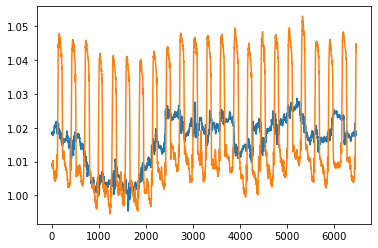

In [233]:
plt.plot(range(6473), Y[-6473:])
plt.plot(range(6473), pred)